#활성화함수

활성화함수 : 신경망에 들어오는 데이터를 신경망에서 신호로 바꿔서 계속 흘려보낼지 말지를 결정하는 함수
         
 1. 시그모이드 함수 : 시그모이드(sigmoid) 란 'S 자 모양' 이라는 뜻
 ~~~
 def sigmoid(x):
    return 1 / (1 + np.exp(-x))
~~~
- 시그모이드 함수의 문제점 ? 층이 깊어지면 기울기 소실 문제가 발생하여 학습이 잘 안된다.

<br>

 2. Relu 함수 (Rectified Linear Unit)  정류된  
" Relu 함수는 0 이하는 0으로 흘려보내고 입력값이 0 이 넘으면 입력값 그대로 흘려보내는 함수 "  
- 정류는 전기회로 용어로, 예를 들어 반파정류회로는 +/- 가 반복되는 교류에서 흐름을 차단하는 회로입니다.
- Relu 함수 그래프(그림3-9 p76) 처럼 x 가 0 이하 일때를 차단하여 아무런 값도
출력하지 않는 (0을 출력) 것 입니다.

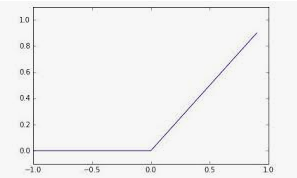

<br>
<br>

예제1. Relu 함수를 생성하시오 !



In [1]:
import numpy as np

def relu(x):
    return np.maximum(0, x)  # 0 과 x 값 중에 큰 값을 출력하시오 !

print( relu(-2) )
print( relu(0.3) )


0
0.3


문제39. 위의 relu 함수를 그래프로 시각화 하시오 !

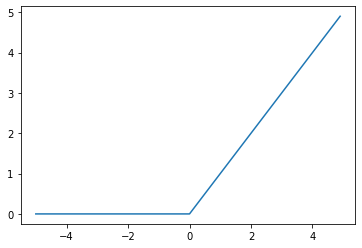

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def relu(x):
    return np.maximum(0, x)

x = np.arange(-5, 5, 0.1)  
y = relu(x)

plt.plot(x,y)
plt.show()

# 다차원 배열 계산
다차원 배열도 그 기본은 '숫자의 집합'  
숫자를 한줄로 늘어선 것이나 정사각형으로 늘어놓은 것이나 3차원으로 늘어놓은 것이나 전부 다차원 배열  

<br>

예제 1. 1차원 배열을 만드는 방법

In [3]:
import numpy as np
a = np.array([1,2,3,4])
print(np.ndim(a)) # 차원을 확인할 수 있음

1


문제 40. 아래의 3 x 2 행렬을 만들고 차원을 확인하시오

$$\begin{pmatrix} 1 & 2 \\ 3 & 4 \\ 5 & 6 \end{pmatrix}$$

In [4]:
m = np.array( [[1,2],[3,4],[5,6]] )
print(np.ndim(m))

2


문제 41. 3차원 배열을 만들어보시오

In [5]:
m = np.array( [[[1,2],[3,4]],[[5,6], [7,8]]] )
print(np.ndim(m))

3


문제 42. 아래의 2차원 배열에서 숫자 3을 출력하시오

$$\begin{pmatrix} 1 & 2 \\ 3 & 4 \\ 5 & 6 \end{pmatrix}$$

In [6]:
m = np.array( [[1,2],[3,4],[5,6]] )
print(m[1][0])

3


문제 43. 아래의 3차원 배열에서 숫자 3을 출력하시오

In [7]:
m = np.array( [[[1,2],[3,4]],[[5,6], [7,8]]] )
print(m[1][0][0])

5


# 행렬의 내적(행렬곱)

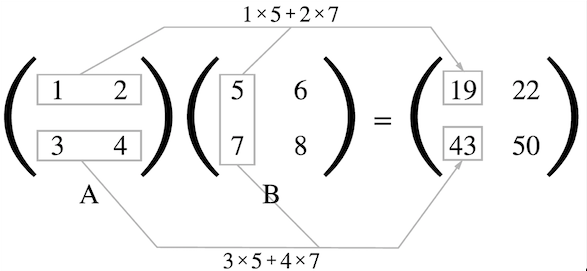
<br>
위의 내적을 총 3가지 방법으로 구현하시오

In [8]:
# 1. 첫번째 방법
x = np.array( [ [1,2], [3,4] ] )
y = np.array( [ [5,6], [7,8] ] )
np.dot(x,y)

array([[19, 22],
       [43, 50]])

In [9]:
# 2. 두번째 방법
x = np.matrix( [ [1,2], [3,4] ] )
y = np.matrix( [ [5,6], [7,8] ] )
print(x*y)

[[19 22]
 [43 50]]


In [10]:
# 3. 세번째 방법
x = np.array( [ [1,2], [3,4] ] )
y = np.array( [ [5,6], [7,8] ] )
print(x@y)

[[19 22]
 [43 50]]


array와 matrix의 기능 차이
- array는 다차원으로 나타낼 수 있는데 matrix는 2차원 밖에 안된다.

행렬곱(내적) 시 주의사항
- 다차원 배열을 곱하려면 두 행렬의 대응하는 차원의 원소 수를 일치시켜야 함

# 신경망 내적
<br>


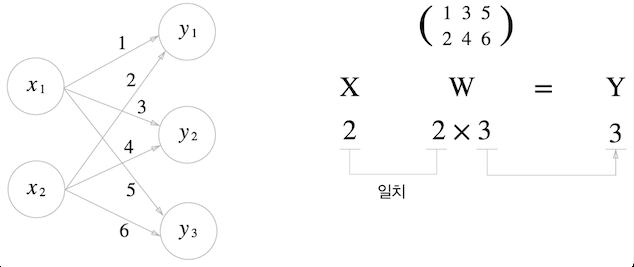


<br>
$x_1 \times 1+ x_2 \times 2 = y_1$  <br>
$x_1 \times 3+ x_2 \times 4 = y_2$  <br>
$x_1 \times 5+ x_2 \times 6 = y_3$  <br>

<br>

$\begin{pmatrix} 1 & 2  \end{pmatrix} \odot \begin{pmatrix} 1 & 3 & 5\\ 2 & 4 & 6 \end{pmatrix} = \begin{pmatrix} y_1 & y_2 & y_3  \end{pmatrix} $



문제 44. 아래의 신경망의 출력 y값을 구하시오
<br>
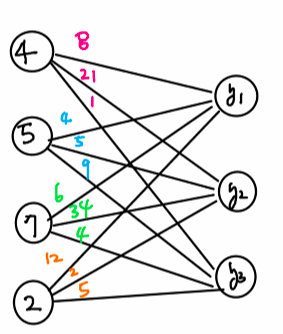

In [11]:
a = np.array([4,5,7,2])
b = np.array([ [8,21,1], [4,5,9], [6,34,4], [12,2,5]] )
np.dot(a,b)

array([118, 351,  87])

# 3층 신경망 구현하기

<br>

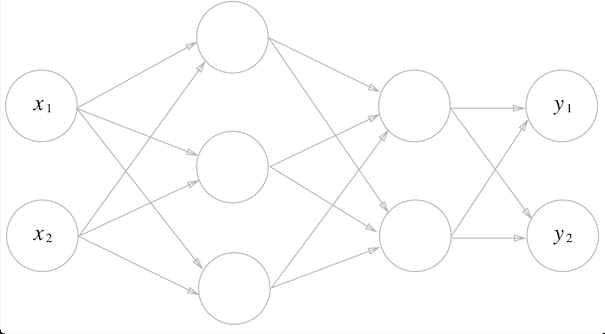


<br>

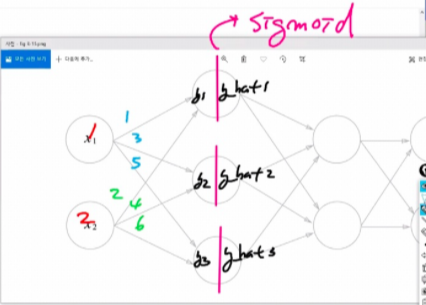

In [12]:
# 1. 입력층 --> 은닉 1층
x = np.array([1,2])
w1 = np.array([[1,3,5],[2,4,6]])
y = np.dot(x,w1)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
    
y_hat = sigmoid(y)
print(y_hat)

[0.99330715 0.9999833  0.99999996]


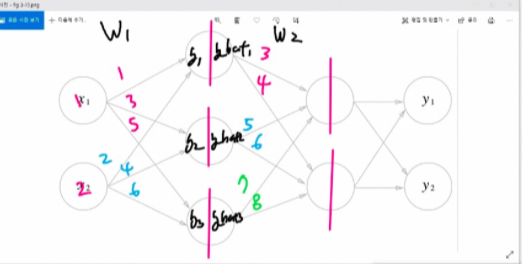

In [13]:
# 2. 입력층 --> 은닉 1층 --> 은닉 2층

# 0층
x = np.array([1,2])

# 1층
w1 = np.array([[1,3,5],[2,4,6]])
y = np.dot(x,w1)
y_hat = sigmoid(y)

# 2층
w2 = np.array([[3,4],[5,6],[7,8]])
z = np.dot(y_hat,w2)
z_hat = sigmoid(z)
print(z_hat)

[0.99999969 0.99999998]


문제 45. 위의 신경망을 출력층까지 구현하시오
<br>
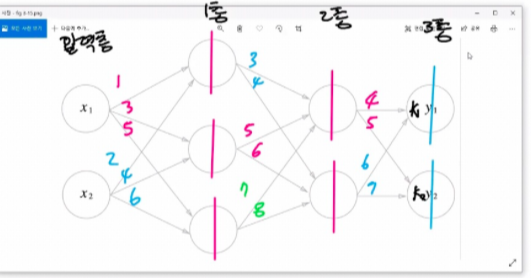

In [14]:
# 0층
x = np.array([1,2])

# 1층
w1 = np.array([[1,3,5],[2,4,6]])
y = np.dot(x,w1)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
y_hat = sigmoid(y)

# 2층
w2 = np.array([[3,4],[5,6],[7,8]])
z = np.dot(y_hat, w2)
z_hat = sigmoid(z)

# 3층
w3 = np.array([[4,5],[6,7]])
k = np.dot(z_hat, w3)
k_hat = sigmoid(k)
print(k_hat)

[0.9999546  0.99999386]


# 출력층 함수
" 출력층 함수는 그동안 흘러왔던 확률들의 숫자를 취합해서 결론을 내줘야 하는 함수"

신경망으로 구현하고자 하는 문제
1. 회귀 항등함수 --> 입력값을 받아 그대로 출력하는 함수
<br>

독립변수: 콘크리트 재질(자갈 200kg, 시멘트 20포대..)  
종속변수: 콘크기트 강도

2. 분류 소프트맥스 함수 --> 책 p91의 식 3.10: 입력값을 받아서 확률벡터로 출력하는 함수  
정상 폐사진 vs 폐결절 사진, 수화동작을 글로 출력하는 신경망  

출력층 함수인 소프트 맥수 함수

$$y_k = \frac{exp(a_k)}{\sum_{i=1}^n exp(a_k)}$$

<br>

위의 식을 파이썬으로 그래도 만들면 에러가 나서 구현이 되지 않음  
왜냐하면 지수함수는 쉽게 아주 큰 값을 출력하기 때문에 overflow가 출력되면서 에러가 난다.  
위의 수학식을 컴퓨터로 구현할 수 있게 하려면 아래와 같이 전해줘야 한다.

<br>

$$y_k = \frac{exp(a_k)}{\sum_{i=1}^n exp(a_i)} = \frac{C exp(a_k)}{C  \sum_{i=1}^n exp(a_i)}=\frac{exp(a_k+\log C)}{\sum_{i=1}^n exp(a_i+\log C)}=\frac{exp(a_k+C^\prime)}{\sum_{i=1}^n exp(a_i+ C^\prime)}$$

<br>

소프트 맥스 함수의 자연상수의 지수함수는 아주 큰값을 출력한다.  
자연상수 e의 10승은 2000이 넘고 e의 100승은 숫자 40개가 넘고 e의 1000승은 무한대를 뜻하는 inf가 출력된다.  
그래서 계산을 할수 없다

In [15]:
# 예:
import numpy as np
print(np.exp(10))
print(np.exp(100))
print(np.exp(1000))

22026.465794806718
2.6881171418161356e+43
inf


<ipython-input-15-42cc59461629>:5: RuntimeWarning: overflow encountered in exp
  print(np.exp(1000))


이를 해결하기 위해서 책 93페이지에 설명처럼 입력신호 중에 최대값을 이용해서 입력신호 값들의 최대값으로 각각의 요소의 값을 빼줌

In [16]:
# 무한대 오류가 남
import numpy as np
a = np.array([1010, 1000, 990])
print(np.exp(a))

[inf inf inf]


<ipython-input-16-0f03e44023fd>:4: RuntimeWarning: overflow encountered in exp
  print(np.exp(a))


In [17]:
# 최대값으로 각각의 요소의 값을 빼주는 코드
import numpy as np
a = np.array([1010, 1000, 990])
C = np.max(a)
minus = a - C
print(np.exp(minus))

[1.00000000e+00 4.53999298e-05 2.06115362e-09]


In [18]:
# 위의 코드를 이용해서 소프트 맥스 함수 구현하기

# 분자식
a = np.array([1010, 1000, 990])

def softmax(a):
    C = np.max(a)
    minus = a - C
    np_exp = np.exp(minus)
    return np_exp

print(softmax(a))

# 분모식까지 포함한 소프트맥스 함수

def softmax(a):
    C = np.max(a)
    minus = a - C
    exp_a = np.exp(minus)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

print(softmax(a))

[1.00000000e+00 4.53999298e-05 2.06115362e-09]
[9.99954600e-01 4.53978686e-05 2.06106005e-09]


문제 46. 위의 결과값이 합이 1이 나오는지 확인하시오

In [19]:
a = np.array([1010, 1000, 990])

def softmax(a):
    C = np.max(a)
    minus = a - C
    exp_a = np.exp(minus)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

print(np.sum(softmax(a)))

1.0


문제 47. 아래의 요소 3개중에 어떤게 가장 큰 값인지 인덱스 번호로 출력하시오  
[9.99954600e-01, 4.53978686e-05, 2.06106005e-09]

In [20]:
a = np.array([1010, 1000, 990])

def softmax(a):
    C = np.max(a)
    minus = a - C
    exp_a = np.exp(minus)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

print(np.argmax(softmax(a)))
# np.argmax란 numpy 리스트의 요소 중 가장 큰 값의 인덱스 번호를 출력하는 함수

0


문제 48. 지금 방금 만든 소프트맥스 함수를 점심시간에 만든 3층 신경망 맨 끝에 출력층에 k 값을 입력받게끔 구현하시오 출력은 k_hat으로 하시오

In [21]:
# 신경망 함수들
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(a):
    C = np.max(a)
    minus = a - C
    exp_a = np.exp(minus)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

# 0층
x = np.array([1,2])

# 1층
w1 = np.array([[1,3,5],[2,4,6]])
y = np.dot(x,w1)
y_hat = sigmoid(y)

# 2층
w2 = np.array([[3,4],[5,6],[7,8]])
z = np.dot(y_hat, w2)
z_hat = sigmoid(z)

# 3층
w3 = np.array([[4,5],[6,7]])
k = np.dot(z_hat, w3)
k_hat = softmax(k)
print(k_hat)

[0.11920296 0.88079704]


문제 49. 위의 3층 신경망 코드에서 w1, w2, w3 가중치를 하나로 모아서 심플한 코드로 작성하시오  
" dictionary를 활용하면 가능 "

In [22]:
import numpy as np

# 가중치를 모아둔 딕셔너리 함수 생성
def init_network():
    network = {}
    network['W1'] = np.array( [ [1,3,5],[2,4,6] ])
    network['W2'] = np.array( [ [3,4],[5,6],[7,8] ])
    network['W3'] = np.array( [ [4,5],[6,7] ])
    return network

# 가중치값을 불러온다.
network = init_network()
w1, w2, w3 = network['W1'], network['W2'], network['W3']

# 신경망 함수들
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(a):
    C = np.max(a)
    minus = a - C
    exp_a = np.exp(minus)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

# 0층
x = np.array([1,2])

# 1층
y = np.dot(x,w1)
y_hat = sigmoid(y)

# 2층
z = np.dot(y_hat, w2)
z_hat = sigmoid(z)

# 3층
k = np.dot(z_hat, w3)
k_hat = softmax(k)
print(k_hat)

[0.11920296 0.88079704]


문제50. 위의 sigmoid, softmax, init_network 함수코드를 common.py 라는 이름으로 메모장에 저장하고 파이썬의 워킹디렉토리에 저장하시오 !

In [23]:
import numpy as np
from common import init_network, sigmoid, softmax

# 가중치 값을 불러온다.
network = init_network()
w1, w2, w3 = network['W1'], network['W2'], network['W3']

# 0층
x = np.array( [1,2] )

# 1층
w1 = np.array([[1,3,5], [2,4,6]])
y = np.dot(x,w1)
y_hat = sigmoid(y)

# 2층
w2 = np.array([[3,4], [5,6], [7,8]])
z = np.dot(y_hat, w2)
z_hat = sigmoid(z)

# 3층
w3 = np.array([[4,5], [6,7]])
k = np.dot(z_hat, w3)
k_hat = softmax(k)
print(k_hat)

[0.11920296 0.88079704]


# 필기체 데이터를 신경망에 로드하기
- 필요한 파일 2가지
    - 1. 필기체 데이터(dataset.zip)
    - 2. 저자가 이미 만들어 놓은 가중치와 바이어스(sample_weight.pkl)  <--  피클 파일


설명: mnist 데이터를 숫자 0~9까지의 숫자 이미지로 구성되어 있고 훈련 데이터가 6만장, 테스트 데이터가 1만장으로 준비되어 있음  
mnist이미지 데이터를 28x28 크기의 회색조 이미지(1채널)이며, 각 픽셀은 0 ~ 255 까지의 값을 취한다.
<br>
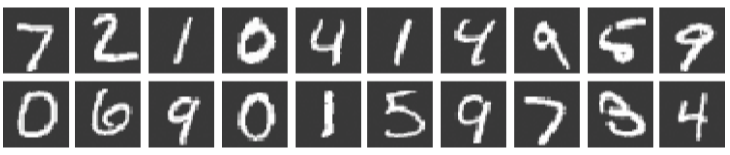

<br>

1. 저자가 제공하고 있는 dataset폴더를 주피터의 워킹 디렉토리로 복사
2. 주피터 노트북에서 아래와 같이 코드를 작성한다


In [24]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten =True, normalize = False)

print( x_train.shape)

(60000, 784)


설명: load_mnist 함수는 필기체 데이터를 불러오는 함수  
normalize: 이미지의 픽셀값을 0.0 ~ 1.0 사이의 값으로 정규화 할지를 정한다.  
flatten: 입력이미지를 1차원배열로 만들지를 정한다.

x_train: 훈련데이터  
t_train: 훈련데이터의 정답  
x_test: 테스트 데이터  
t_test: 테스트 데이터의 정답 

In [25]:
import numpy as np
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten =True, normalize = False)

print( x_train.shape)

(60000, 784)


문제 51. 테스트 데이터는 몇장이 있는지 확인하시오

In [26]:
print( x_test.shape)

(10000, 784)


문제 52. 훈련데이터의 첫번째 필기체의 숫자가 무엇인지 정답을 출력해서 알아내시오

In [27]:
print(t_train[0])

5


문제 53. 훈련 데이터의 첫번째 필기체 데이터를 2차원으로 해서 시각화 하시오  
pillow 모듈을 설치하시오

In [28]:
from PIL import Image # 이미지를 시각화하기 위한 모듈

(x_train, t_train), (x_test, t_test) = load_mnist(flatten =True, normalize = False)
img = x_train[3]
print(img.shape) # flatten 하였기 때문에 (784, ) 1차원배열로 보임
img = img.reshape(28,28) # 2차원으로 reshape

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

img_show(img)

(784,)


문제 54. mnist 데이터를 flatten 시키지말고 출력하시오

In [29]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten =False, normalize = False)
print(x_train.shape)
#    (60000,           1,            28, 28 )
# 필기체 전체 사진수, 색조(1=흑백, 3=컬러), 가로, 세로 

(60000, 1, 28, 28)


문제 55. 아이린 사진을 파이썬에서 시각화하시오

(500, 500, 3)


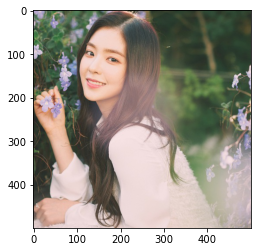

In [30]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = Image.open('아이린.jpg')
img_pixel = np.array(img) # 이미지를 numpy array로 변환
plt.imshow(img_pixel)     # 이미지 시각화
print(img_pixel.shape)    # (500 (가로), 500(세로), 3(색조))

문제 56. 아이린 사진에서 red부분의 행렬을 취하고 red 부분만 이미지로 시각화하시오

[[ 79 113 147 ...  50  50  50]
 [101 137 169 ...  51  51  50]
 [116 152 181 ...  49  49  49]
 ...
 [219 219 222 ... 163 173 184]
 [222 222 224 ... 163 174 184]
 [222 223 225 ... 165 176 184]]


<function matplotlib.pyplot.show(close=None, block=None)>

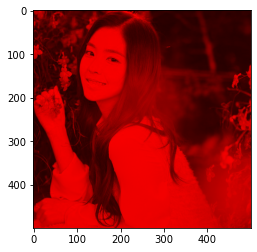

In [31]:
img = Image.open('아이린.jpg')
img_pixel = np.array(img) # 이미지를 numpy array로 변환
print(img_pixel[:,:,0]) # red 부분 행렬만 출력

img_pixel[:,:,1] = 0 # green 부분을 전부 0으로 변경
img_pixel[:,:,2] = 0 # blue 부분을 전부 0으로 변경

plt.imshow(img_pixel)     # 이미지 시각화
plt.show

문제 57. 아이린 사진에서 green 부분만 시각화하시오

[[ 79 113 147 ...  50  50  50]
 [101 137 169 ...  51  51  50]
 [116 152 181 ...  49  49  49]
 ...
 [219 219 222 ... 163 173 184]
 [222 222 224 ... 163 174 184]
 [222 223 225 ... 165 176 184]]


<function matplotlib.pyplot.show(close=None, block=None)>

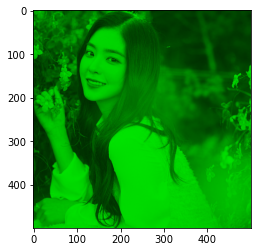

In [32]:
img = Image.open('아이린.jpg')
img_pixel = np.array(img) # 이미지를 numpy array로 변환
print(img_pixel[:,:,0]) # red 부분 행렬만 출력

img_pixel[:,:,0] = 0 # red 부분을 전부 0으로 변경
img_pixel[:,:,2] = 0 # blue 부분을 전부 0으로 변경

plt.imshow(img_pixel)     # 이미지 시각화
plt.show

문제 58. 인터넷에서 원하는 사진을 받아서 파이썬으로 시각화하는데 red, green, blue 중에 하나로만 시각화하시오

<function matplotlib.pyplot.show(close=None, block=None)>

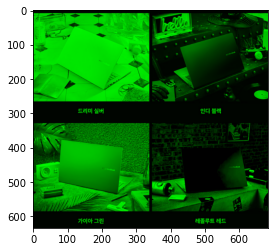

In [33]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = Image.open('노트북.png')
img_pixel = np.array(img)

img_pixel[:,:,0] = 0 # red 부분을 전부 0으로 변경
img_pixel[:,:,2] = 0 # blue 부분을 전부 0으로 변경

plt.imshow(img_pixel)     # 이미지 시각화
plt.show

문제 59. 아이린 사진을 흑백으로 변경하시오

사진은 RGB 모두가 500개의 픽셀로 이루어져있음  
컬러사진: RGB(3가지 색깔 -> 3차원)  
흑백사진: Gray(1가지 색깔)  

<br>

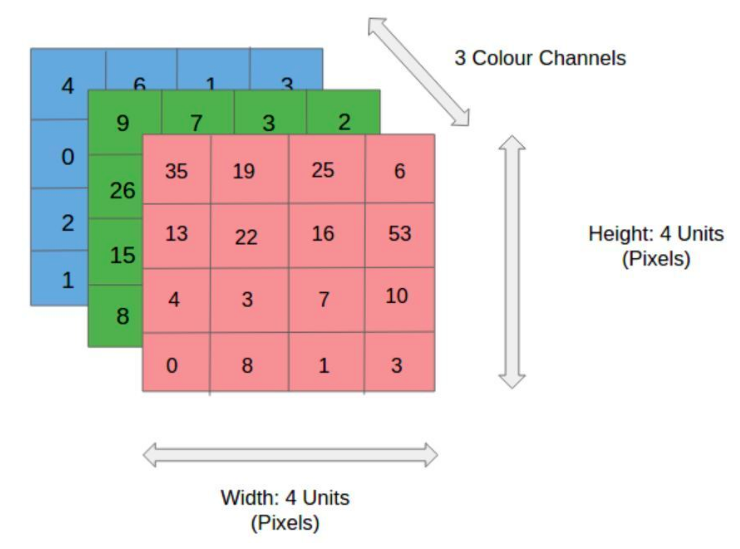

In [34]:
import numpy as np # 신경망에 사진을 입력할때 숫자 행렬로 입력해야 하기 때문에 필요함
import matplotlib.pyplot as plt  # 사진을 파이썬에서 시각화하기 위해 필요
import matplotlib.image as mpimg # 사진을 불러와서 숫자로 변환해주기 위해 필요

def rgb2gray(rgb):  # 흑백으로 색깔을 변경하기 위한 함수
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
               # rbg[행, 열, 색조] 원래는 rbg[:,:,:] 이렇게 써야 하지만 행, 열, 색조를 쓰지 않고 생략했다.

j= '아이린.jpg'

img = mpimg.imread(j) # 사진을 숫자로 변경
img.shape

(500, 500, 3)

In [35]:
gray = rgb2gray(img)
gray.shape

(500, 500)

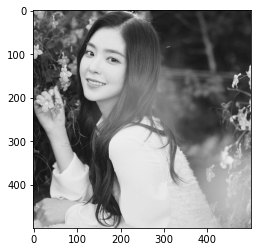

In [36]:
import numpy as np # 신경망에 사진을 입력할때 숫자 행렬로 입력해야 하기 때문에 필요함
import matplotlib.pyplot as plt  # 사진을 파이썬에서 시각화하기 위해 필요
import matplotlib.image as mpimg # 사진을 불러와서 숫자로 변환해주기 위해 필요

def rgb2gray(rgb):  # 흑백으로 색깔을 변경하기 위한 함수
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
               # rbg[행, 열, 색조] 원래는 rbg[:,:,:] 이렇게 써야 하지만 행, 열, 색조를 쓰지 않고 생략했다.

j= '아이린.jpg'

img = mpimg.imread(j) # 사진을 숫자로 변경
gray = rgb2gray(img)
plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.show()

[[ 91.829 118.785 143.98  ...  63.028  63.028  63.028]
 [114.057 142.785 165.98  ...  62.039  62.039  61.039]
 [128.926 157.654 178.208 ...  60.039  60.039  60.039]
 ...
 [205.094 205.094 208.094 ... 152.143 161.784 172.898]
 [208.094 208.094 210.094 ... 152.143 162.784 172.898]
 [208.094 209.094 211.094 ... 154.143 164.784 172.898]]


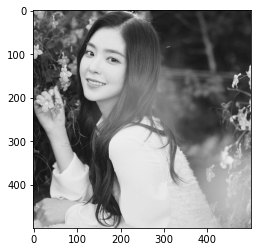

In [37]:
print(gray)
gray.flatten() # 1차원으로 변경하기 위한 코드
plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.show()

문제 60. 어제 마지막 문제로 풀었던 사진을 흑백으로 변경하고 1차원으로 flatten 시키시오

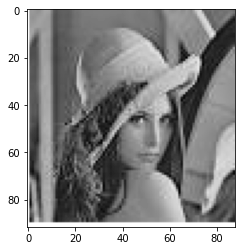

In [38]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = Image.open('lena2.png')
img_pixel = np.array(img)

def rgb2gray(rgb):  # 흑백으로 색깔을 변경하기 위한 함수
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
               # rbg[행, 열, 색조] 원래는 rbg[:,:,:] 이렇게 써야 하지만 행, 열, 색조를 쓰지 않고 생략했다.

img= 'lena2.png'

img = mpimg.imread(img) # 사진을 숫자로 변경
gray = rgb2gray(img)
plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.show()

# 필기체 데이터를 인식하는 3층 신경망 구현하기

In [39]:
import numpy as np
from common import init_network, sigmoid, softmax

# 가중치 값을 불러온다.
network = init_network()
w1, w2, w3 = network['W1'], network['W2'], network['W3']
b1, b2, b3 = network['b1'], network['b2'], network['b3']
# 편향은 뉴런이 얼마나 쉽게 활성화(결과로 1을 출력)하느냐를 조정하는 매개 변수

# 0층 입력층
x = np.array( [1,2] )

# 1층
w1 = np.array([[1,3,5], [2,4,6]])
y = np.dot(x,w1)
y_hat = sigmoid(y)

# 2층
w2 = np.array([[3,4], [5,6], [7,8]])
z = np.dot(y_hat, w2)
z_hat = sigmoid(z)

# 3층
w3 = np.array([[4,5], [6,7]])
k = np.dot(z_hat, w3)
k_hat = softmax(k)
print(k_hat)

[0.11920296 0.88079704]


In [40]:
# 예제 1. pickle 파일 생성하는 예제
import pickle

a = ['a', 'b', 'c']
with open("a.pkl","wb") as f:
    pickle.dump(a, f)

In [41]:
# 예제 2. pickle 파일을 파이썬으로 로드

with open("a.pkl","rb") as f:
    data = pickle.load(f)
    
print(data)

['a', 'b', 'c']


저자가 이미 만들어온 가중치(w)와 바이어스(b)가 들어있는 pickle 파일을 파이썬으로 불러와서 가중치와 바이어스의 shape를 확인하는 방법

In [42]:
import pickle

def init_network():
    with open("sample_weight.pkl", "rb") as f:
        network = pickle.load(f)
    return network

network=init_network() 
print(network['W1'].shape) # 은닉 1층의 노드수
print(network['W2'].shape) # 은닉 2층의 노드수
print(network['W3'].shape) # 출력층 3층의 노드수

(784, 50)
(50, 100)
(100, 10)


입력층 ---------> 은닉1층 -------------------> 은닉 2층 -------------------> 출력층 3층  
(100, 784)  $\odot$ (784, 50) -> (100, 50) $\odot$ (50, 100)  -> (100, 100)$\odot$ (100, 10)  
최종 결과값: (100, 10) -> 필기체 100개의 데이터가 10개의 확률 벡터로 나옴(소프트맥스 함수를 쓰면 결과값이 확률 벡터 형태로 나옴)
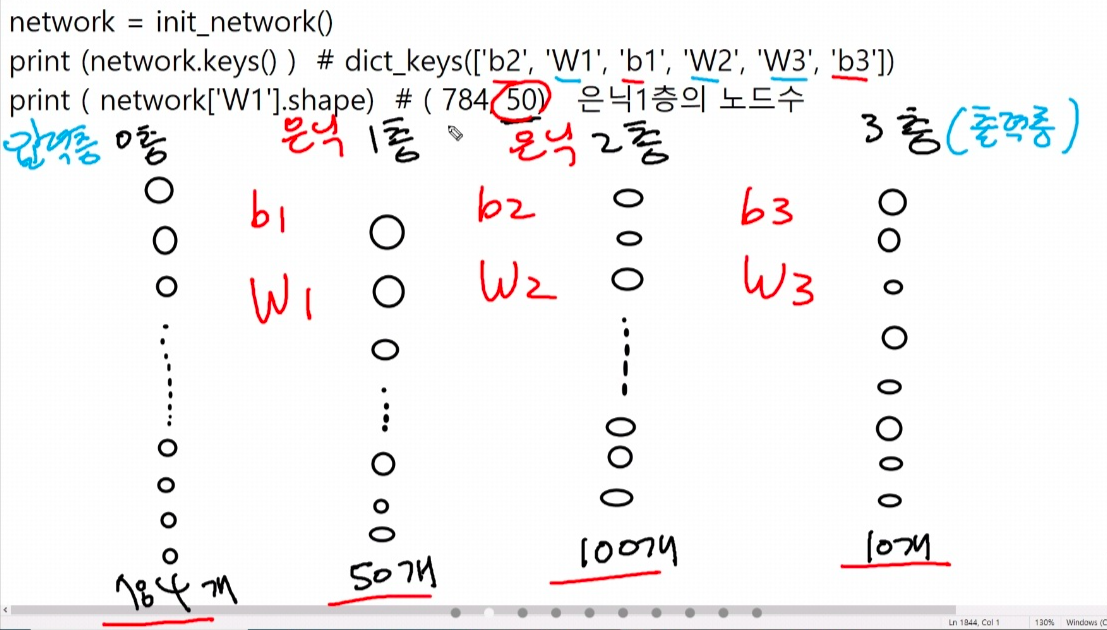

In [43]:
import numpy as np
from common import init_network, sigmoid, softmax

# 가중치 값을 불러온다.
network = init_network()
w1, w2, w3 = network['W1'], network['W2'], network['W3']
b1, b2, b3 = network['b1'], network['b2'], network['b3']

network = init_network()
print(network['W1'].shape)

(784, 50)


In [44]:
#  필기체 데이터 불러오는 코드
import numpy as np
from common import init_network, softmax, sigmoid
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize = True,
                                                 one_hot_label=True)
print(t_train[0:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


one_hot_label은 정답을 숫자로 표현할건지 아니면 아래와 같이 one hot encoding할건지를 결정하는 파라미터  

|One_hot_label|0|1|2|3|4|5|6|7|8|9|
|-------------|-|-|-|-|-|-|-|-|-|-|
|True(when 2)|0|0|1|0|0|0|0|0|0|0|
|Fasle(when 2)|||2|||||||


In [4]:
import numpy as np
from common import  init_network, sigmoid, softmax
from  dataset.mnist  import  load_mnist 

# 1. 데이터를 불러옵니다. 
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True,  one_hot_label=False) 

# 2. 가중치와 바이어스 값을 불러옵니다. (저자가 미리 학습 시킨 가중치와 바이어스)
network = init_network()
w1, w2, w3 = network['W1'], network['W2'], network['W3']
b1, b2, b3 = network['b1'], network['b2'], network['b3']

# 3. 신경망을 구성합니다. 
# 0층
x = x_train[0:10]  # 일단 10개의 필기체 데이터를 구성합니다. 

# 1층
y = np.dot(x,w1) + b1
y_hat = sigmoid(y)

# 2층
z = np.dot(y_hat, w2) + b2
z_hat = sigmoid(z)

# 3층
k = np.dot(z_hat, w3) + b3
k_hat =  softmax(k)
print(np.argmax(k_hat, axis=1)   )  # axis =1 이 축 
print(t_train[0:10]) # 실제 정답

[5 0 4 1 9 2 1 3 1 4]
[5 0 4 1 9 2 1 3 1 4]


문제 62. 이번에는 훈련데이터 총 100장을 흘려보내고 100개중에 총 몇개를 맞췄는지 확인하시오

In [23]:
import numpy as np
from common import  init_network, sigmoid, softmax
from  dataset.mnist  import  load_mnist 

# 1. 데이터를 불러옵니다. 
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True,  one_hot_label=False) 

# 2. 가중치와 바이어스 값을 불러옵니다. (저자가 미리 학습 시킨 가중치와 바이어스)
network = init_network()
w1, w2, w3 = network['W1'], network['W2'], network['W3']
b1, b2, b3 = network['b1'], network['b2'], network['b3']

# 3. 신경망을 구성합니다. 
# 0층
x = x_train[0:100]  # 일단 10개의 필기체 데이터를 구성합니다. 

# 1층
y = np.dot(x,w1) + b1
y_hat = sigmoid(y)

# 2층
z = np.dot(y_hat, w2) + b2
z_hat = sigmoid(z)

# 3층
k = np.dot(z_hat, w3) + b3
k_hat =  softmax(k)

# 정답 개수 확인
a = np.argmax(k_hat, axis=1)   # axis =1 이 축 
b = t_train[0:100]
print('총', len(b), '개 중에서', sum(a==b), '개 맞췄습니다!')      # 총 100 개 중에서 96 개 맞췄습니다!


총 100 개 중에서 96 개 맞췄습니다!


In [22]:
import numpy as np
from common import  init_network, sigmoid, softmax
from  dataset.mnist  import  load_mnist 

#  1. 데이터를 불러옵니다. ( 얀르쿤 교수님이 만든 필기체 데이터)
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True,  one_hot_label=False) 
    return  x_test, t_test 

def predict(network, x):
# 2. 가중치와 바이어스 값을 불러옵니다. (저자가 미리 학습 시킨 가중치와 바이어스)
    # network = init_network()
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    # 3. 신경망을 구성합니다. 
    # 0층
    # x = x_train[0:100]  # 일단 10개의 필기체 데이터를 구성합니다. 

    # 1층
    y = np.dot(x,w1) + b1
    y_hat = sigmoid(y)

    # 2층
    z = np.dot(y_hat, w2) + b2
    z_hat = sigmoid(z)

    # 3층
    k = np.dot(z_hat, w3) + b3
    k_hat =  softmax(k)
    return k_hat

# 3. 위에서 만든 get_data함수와 predict 함수를 가져다가 실행하는 코드
x,t = get_data() # 테스트 데이터와 테스트 데이터의 정답을 불러오는 코드
network = init_network() # 저자가 만들어온 가중치와 바이어스를 불러오는 코드

accuracy_cnt = 0
for i in range( len(x) ):
    y = predict( network, x[i] )
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1

print( '정확도: ',accuracy_cnt/len(x) )

정확도:  0.9352


문제 63. 10000장 전체를 다 돌리지 말고 1000장만 돌려서 정확도를 확인하시오

In [26]:
import numpy as np
from common import  init_network, sigmoid, softmax
from  dataset.mnist  import  load_mnist 

#  1. 데이터를 불러옵니다. ( 얀르쿤 교수님이 만든 필기체 데이터)
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True,  one_hot_label=False) 
    return  x_test, t_test 

def predict(network, x):
# 2. 가중치와 바이어스 값을 불러옵니다. (저자가 미리 학습 시킨 가중치와 바이어스)
    # network = init_network()
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    # 3. 신경망을 구성합니다. 
    # 0층
    # x = x_train[0:100]  # 일단 10개의 필기체 데이터를 구성합니다. 

    # 1층
    y = np.dot(x,w1) + b1
    y_hat = sigmoid(y)

    # 2층
    z = np.dot(y_hat, w2) + b2
    z_hat = sigmoid(z)

    # 3층
    k = np.dot(z_hat, w3) + b3
    k_hat =  softmax(k)
    return k_hat

# 3. 위에서 만든 get_data함수와 predict 함수를 가져다가 실행하는 코드
x,t = get_data() # 테스트 데이터와 테스트 데이터의 정답을 불러오는 코드
network = init_network() # 저자가 만들어온 가중치와 바이어스를 불러오는 코드

accuracy_cnt = 0
for i in range( 1000 ):
    y = predict( network, x[i] )
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1

print( '정확도: ',accuracy_cnt/ 1000 ) 

정확도:  0.932


문제 64. 훈련 데이터 6만장을 다 불러와서 신경망에 넣고 전체 6만개 중에 몇개를 맞추는지 정확도를 확인하시오

In [28]:
import numpy as np
from common import  init_network, sigmoid, softmax
from  dataset.mnist  import  load_mnist 

#  1. 데이터를 불러옵니다. ( 얀르쿤 교수님이 만든 필기체 데이터)
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True,  one_hot_label=False) 
    return  x_train, t_train 

def predict(network, x):
# 2. 가중치와 바이어스 값을 불러옵니다. (저자가 미리 학습 시킨 가중치와 바이어스)
    # network = init_network()
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    # 3. 신경망을 구성합니다. 
    # 0층
    # x = x_train[0:100]  # 일단 10개의 필기체 데이터를 구성합니다. 

    # 1층
    y = np.dot(x,w1) + b1
    y_hat = sigmoid(y)

    # 2층
    z = np.dot(y_hat, w2) + b2
    z_hat = sigmoid(z)

    # 3층
    k = np.dot(z_hat, w3) + b3
    k_hat =  softmax(k)
    return k_hat

# 3. 위에서 만든 get_data함수와 predict 함수를 가져다가 실행하는 코드
x,t = get_data() # 테스트 데이터와 테스트 데이터의 정답을 불러오는 코드
network = init_network() # 저자가 만들어온 가중치와 바이어스를 불러오는 코드

accuracy_cnt = 0
for i in range( len(x) ):
    y = predict( network, x[i] )
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1

print( '정확도: ',accuracy_cnt/ len(x) ) 

정확도:  0.9357666666666666


문제 65. 위의 코드의 1번과 2번부분을 클래스로 생성하시오 ( 클래스 이름: three_nn )

In [30]:
class Three_Nn():
    import numpy as np
    import pickle
    from common import  init_network, sigmoid, softmax
    from  dataset.mnist  import  load_mnist 

    #  1. 데이터를 불러옵니다. ( 얀르쿤 교수님이 만든 필기체 데이터)
    def get_data(self):
        (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True,  one_hot_label=False) 
        return  x_train, t_train 

    def predict(self, network, x):
    # 2. 가중치와 바이어스 값을 불러옵니다. (저자가 미리 학습 시킨 가중치와 바이어스)
        # network = init_network()
        w1, w2, w3 = network['W1'], network['W2'], network['W3']
        b1, b2, b3 = network['b1'], network['b2'], network['b3']

        # 3. 신경망을 구성합니다. 
        # 0층
        # x = x_train[0:100]  # 일단 10개의 필기체 데이터를 구성합니다. 

        # 1층
        y = np.dot(x,w1) + b1
        y_hat = sigmoid(y)

        # 2층
        z = np.dot(y_hat, w2) + b2
        z_hat = sigmoid(z)

        # 3층
        k = np.dot(z_hat, w3) + b3
        k_hat =  softmax(k)
        return k_hat

n1 = Three_Nn() # 객체화시킨다 설계도 가지고 제품을 만든다.

x,t = n1.get_data() # 테스트 데이터와 테스트 데이터의 정답을 불러오는 코드
network = init_network() # 저자가 만들어온 가중치와 바이어스를 불러오는 코드

accuracy_cnt = 0
for i in range( len(x) ):
    y = predict( network, x[i] )
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1

print( '정확도: ',accuracy_cnt/ len(x) ) 

정확도:  0.9357666666666666


문제 66. 훈련 데이터의 첫번째 데이터를 3층 신경망에 넣고 예측값을 출력하시오

In [35]:
n1 = Three_Nn() # 객체화시킨다 설계도 가지고 제품을 만든다.

x,t = n1.get_data() # 테스트 데이터와 테스트 데이터의 정답을 불러오는 코드
network = init_network() # 저자가 만들어온 가중치와 바이어스를 불러오는 코드

result = n1.predict( network, x[0] )
print(np.argmax(result))
print(t[0])

5
5


문제 67. 아이린 사진을 필기체를 인식하는 3층 신경망에 넣으면 어떤게 출력이 되는지 알아보시오  
(1, 250000) $\odot$ (784, 50 ) -> 차원이 일치 하지 않기 때문에 에러가 생성됨

# 배치처리

훈련데이터가 6만장이나 되는데 6만장을 한번에 신경망에 넣고 학습을 시키게 되면 컴퓨터가 메모리 사용량이 초과하게 되어서 수행이 되지 않습니다.  

<br>

ex) 사람이 책을 볼때도 한번에 책 한권을 동시에 볼 수 없고 한페이지 한페에지씩 보듯이 컴퓨터도 마찬가지로 메모리가 허용하는 내에서 여러 페이지를 학습할 수 있도록 해주는 것

<br>
필기체 6만장을 학습할 때 1개씩 학습한다면 6만번 실행을 predict 해야 함 (predict함수를 6만번 실행해야 함)  
필기체 6만장을 하습할 때 한번에 100개씩 학습한다면 predict함수를 몇번 실행하면 되는가? -> 600번 ( 훨씬 수행 속도가 빠름 )  
배치 처리를 해야 학습이 더 빠르게 되고 학습이 가능한 상태가 됨

<br>

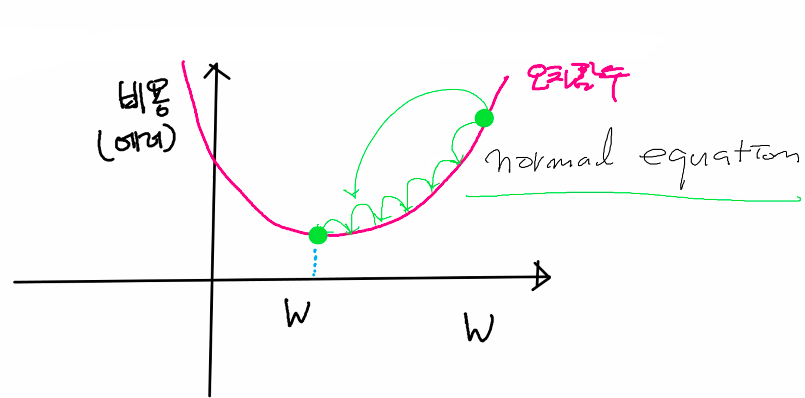
<br>

문제 68. 지금은 훈련데이터 6만장을 한번에 predict에 넣고 예측하는 것이었는데 그러지 말고 100개씩 넣고 예측해서 정확도가 600개가 a라는 리스트에 담기게 하시오

In [42]:
class Three_Nn():
    import numpy as np
    import pickle
    from common import  init_network, sigmoid, softmax
    from  dataset.mnist  import  load_mnist 

    #  1. 데이터를 불러옵니다. ( 얀르쿤 교수님이 만든 필기체 데이터)
    def get_data(self):
        (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True,  one_hot_label=False) 
        return  x_train, t_train 

    def predict(self, network, x):
    # 2. 가중치와 바이어스 값을 불러옵니다. (저자가 미리 학습 시킨 가중치와 바이어스)
        # network = init_network()
        w1, w2, w3 = network['W1'], network['W2'], network['W3']
        b1, b2, b3 = network['b1'], network['b2'], network['b3']

        # 3. 신경망을 구성합니다. 
        # 0층
        # x = x_train[0:100]  # 일단 10개의 필기체 데이터를 구성합니다. 

        # 1층
        y = np.dot(x,w1) + b1
        y_hat = sigmoid(y)

        # 2층
        z = np.dot(y_hat, w2) + b2
        z_hat = sigmoid(z)

        # 3층
        k = np.dot(z_hat, w3) + b3
        k_hat =  softmax(k)
        return k_hat

n1 = Three_Nn() # 객체화시킨다 설계도 가지고 제품을 만든다.

x,t = n1.get_data() # 테스트 데이터와 테스트 데이터의 정답을 불러오는 코드
network = init_network() # 저자가 만들어온 가중치와 바이어스를 불러오는 코드
a = []
batch_size = 100
accuracy_cnt = 0

for i in range( 0, len(x), batch_size ):    # 0, 100, 200, 300, 400, ...
    y = predict( network, x[i: i + batch_size] ) # x[0:100], x[100:200]
    y_hat = np.argmax(y, axis=1)   # 100개의 예측 숫자들이 출력됨
    a.append( sum(y_hat == t[i:i+batch_size]) / 100) # 에측 100개와 정답 100개를 비교해서 정확도를 계산
print( a )  # 600개의 정확도가 들어있다.

[0.96, 0.94, 0.9, 0.97, 0.94, 0.93, 0.92, 0.92, 0.92, 0.92, 0.88, 0.9, 0.91, 0.92, 0.97, 0.92, 0.97, 0.97, 0.97, 0.95, 0.91, 0.96, 0.94, 0.97, 0.94, 0.96, 0.95, 0.95, 0.95, 0.94, 0.92, 0.98, 0.92, 0.93, 0.97, 0.96, 0.93, 0.91, 0.97, 1.0, 0.95, 0.92, 0.94, 0.95, 0.96, 0.97, 0.9, 0.96, 0.93, 0.95, 0.97, 0.89, 0.97, 0.91, 0.97, 0.97, 0.93, 0.9, 0.93, 0.98, 0.98, 0.96, 0.95, 0.97, 0.94, 0.99, 0.96, 0.96, 0.9, 0.9, 0.9, 0.92, 0.9, 0.91, 0.96, 0.95, 0.94, 0.94, 0.88, 0.92, 0.95, 0.94, 0.89, 0.98, 0.86, 0.96, 0.88, 0.85, 0.87, 0.95, 0.97, 0.93, 0.92, 0.93, 0.92, 0.93, 0.94, 0.94, 0.95, 0.96, 0.94, 0.94, 0.86, 0.96, 0.98, 0.97, 0.98, 0.92, 0.98, 0.96, 0.96, 0.96, 0.95, 0.94, 0.94, 0.89, 0.92, 0.89, 0.93, 0.94, 0.91, 0.92, 0.94, 0.93, 0.9, 0.88, 0.88, 0.93, 0.96, 0.91, 0.85, 0.91, 0.98, 0.95, 0.96, 0.98, 0.92, 0.9, 0.94, 0.91, 0.92, 0.91, 0.9, 0.84, 0.96, 0.92, 0.91, 0.86, 0.89, 0.98, 0.95, 0.9, 0.94, 0.94, 0.96, 0.95, 0.98, 0.84, 0.94, 0.94, 0.92, 0.95, 0.95, 0.97, 0.95, 0.93, 0.91, 0.92, 0.93

# 총정리
1. 신경망에 들어가는 함수들인 시그모이드 함수, 렐루 함수, 소프트 맥스 함수를 파이썬으로 생성함  
2. 저자가 만들어 온 가중치 피클파일로 3층 신경망을 구현  
3. 배치처리로 데이터를 신경망에 흘려보내는 이유와 구현  
신경망이 학습할 때는 데이터 전체를 한번에 학습할 수 없고 조금씩 학습해서 전체를 다 학습해라 라고 하는게 배치처리